# Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

# Load Dataset


In [3]:
df = pd.read_csv('marketing_data.csv')
df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.shape

(2240, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Convert Dt_Customer to Date Format

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Check Missing Values

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

# Clean Categorical Columns

In [10]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [11]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [12]:
# Fix Invalid Categories
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

# Income Imputation

In [25]:
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [26]:
df['Income'] = df['Income'].astype(str)

In [27]:
df['Income'] = df['Income'].str.replace(r'[^0-9.]', ' ', regex=True)

In [28]:
df['Income'] = df['Income'].str.split().str[0]

In [29]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')


In [30]:
df[['Income']].head(10)

,Income
0,84.0
1,57.0
2,67.0
3,32.0
4,21.0
5,71.0
6,63.0
7,44.0
8,65.0
9,65.0


In [31]:
df['Income'].dtype

dtype('float64')

In [32]:
df['Income'] = (
    df.groupby(['Education', 'Marital_Status'], observed=True)['Income']
      .transform('mean')
)

In [33]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [34]:
df['Income'].isnull().sum()

np.int64(0)

# Feature Engineering

In [4]:
# Total Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [5]:
#Age
df['Age'] = 2025 - df['Year_Birth']

In [6]:
#Total Spending
spend_cols = ['MntWines','MntFruits','MntMeatProducts',
              'MntFishProducts','MntSweetProducts','MntGoldProds']

df['Total_Spending'] = df[spend_cols].sum(axis=1)


In [8]:
#Total Purchases
df['Total_Purchases'] = df['NumWebPurchases'] + \
                         df['NumCatalogPurchases'] + \
                         df['NumStorePurchases']


# Distribution Plots & Outlier Detection

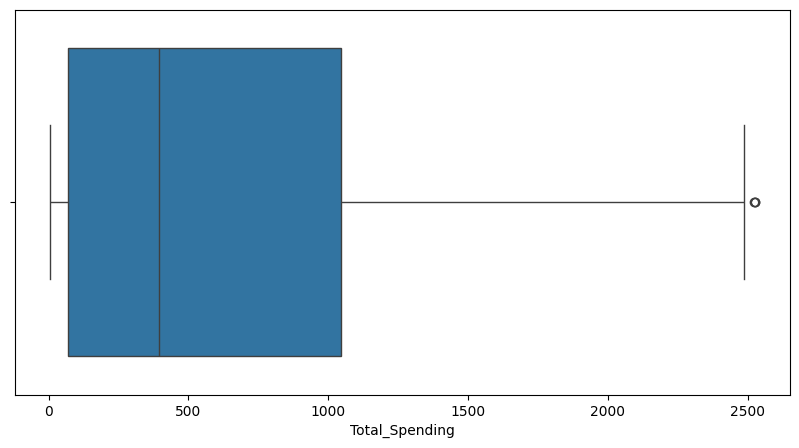

In [ ]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Total_Spending'])
plt.show()

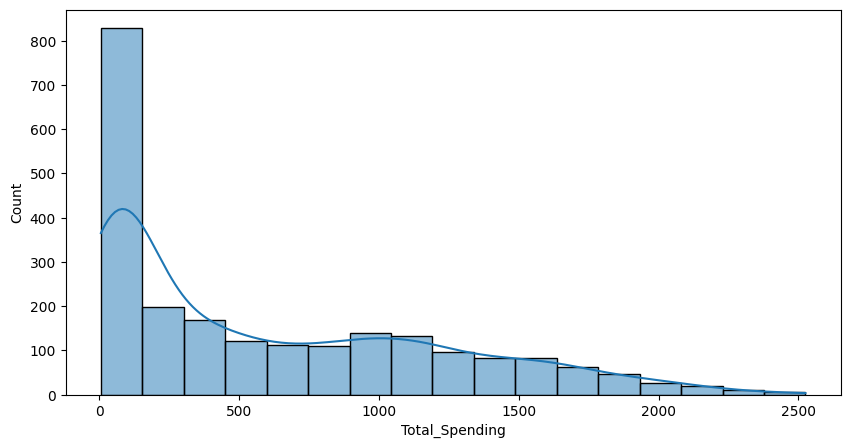

In [10]:
#Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['Total_Spending'], kde=True)
plt.show()

In [11]:
#Outlier Treatment (IQR)
Q1 = df['Total_Spending'].quantile(0.25)
Q3 = df['Total_Spending'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Total_Spending'] >= Q1 - 1.5*IQR) &
        (df['Total_Spending'] <= Q3 + 1.5*IQR)]

# Encoding Categorical Variables

In [12]:
#Ordinal Encoding – Education
edu_order = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
ord_enc = OrdinalEncoder(categories=edu_order)

df['Education_Encoded'] = ord_enc.fit_transform(df[['Education']])

In [13]:
#One-Hot Encoding – Marital Status & Country
df = pd.get_dummies(df, columns=['Marital_Status','Country'], drop_first=True)
df.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,Graduation,"$84,835.00",0,0,6/16/14,0,189,104,...,False,False,False,False,False,False,False,False,True,False
1,1,1961,Graduation,"$57,091.00",0,0,6/15/14,0,464,5,...,False,False,False,True,False,False,False,False,False,False
2,10476,1958,Graduation,"$67,267.00",0,1,5/13/14,0,134,11,...,False,False,False,False,False,False,False,False,False,True
3,1386,1967,Graduation,"$32,474.00",1,1,5/11/14,0,10,0,...,True,False,False,False,False,False,False,False,False,False
4,5371,1989,Graduation,"$21,474.00",1,0,4/8/14,0,6,16,...,False,False,False,False,False,False,False,False,True,False


# Correlation Heatmap

In [15]:
num_df = df.select_dtypes(include=np.number)

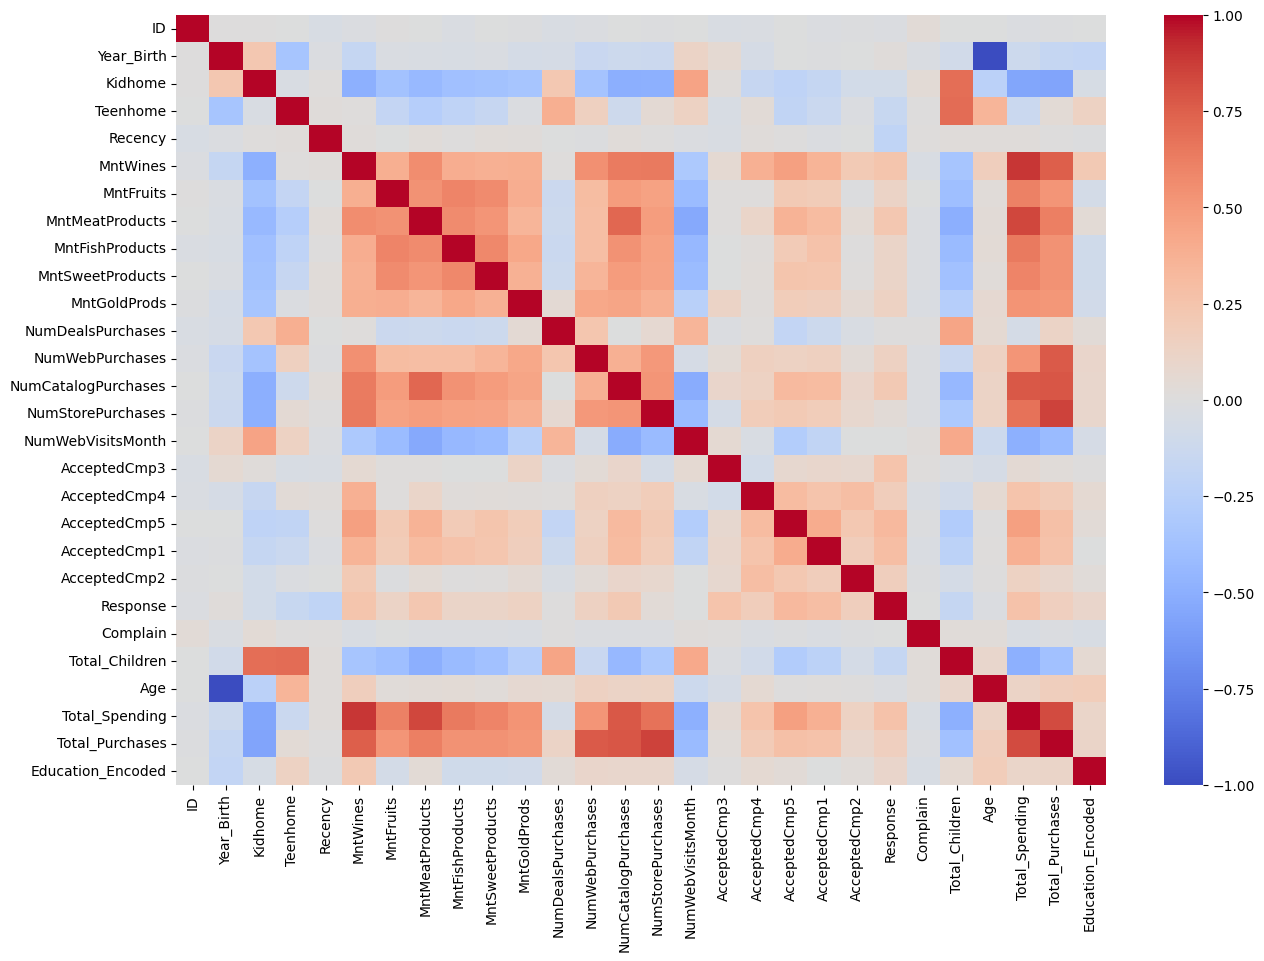

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(), cmap='coolwarm')
plt.show()

# HYPOTHESIS TESTING

## Older people prefer store purchases

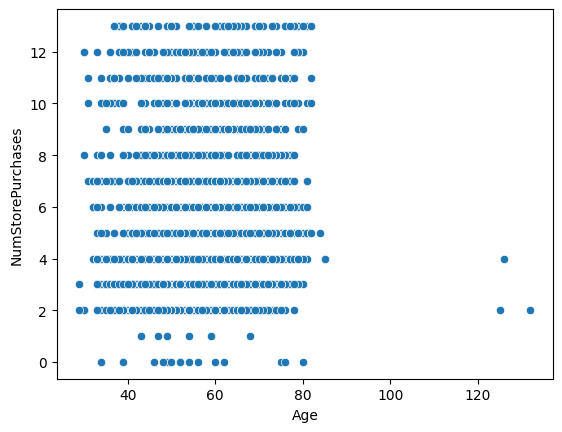

In [17]:
sns.scatterplot(x='Age', y='NumStorePurchases', data=df)
plt.show()

## Customers with children prefer online shopping

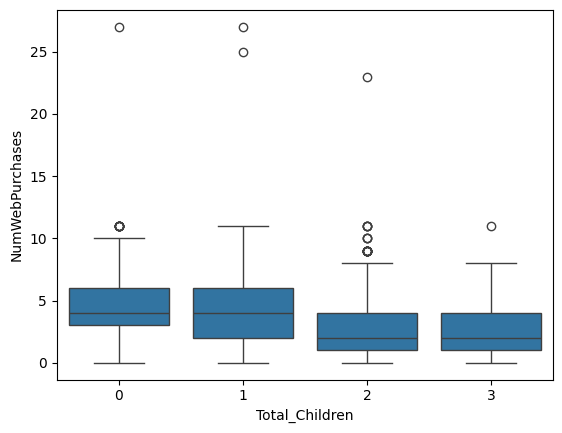

In [18]:
sns.boxplot(x='Total_Children', y='NumWebPurchases', data=df)
plt.show()

## Store sales cannibalized by other channels

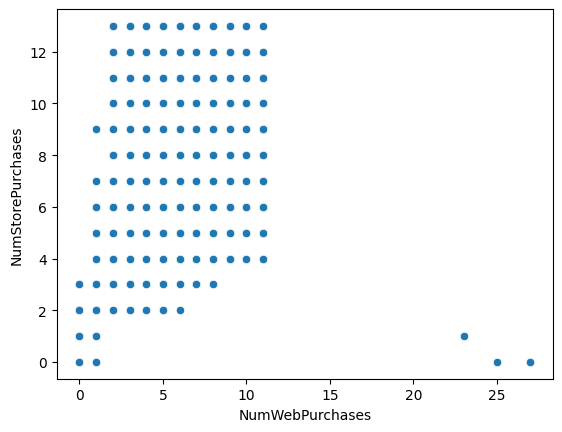

In [19]:
sns.scatterplot(x='NumWebPurchases', y='NumStorePurchases', data=df)
plt.show()


## USA vs Rest of World

In [20]:
df.groupby('Country_US')['Total_Purchases'].sum()

Country_US
False    26548
True      1473
Name: Total_Purchases, dtype: int64

# VISUAL ANALYSIS

### Top & Lowest Revenue Products

In [21]:
df[spend_cols].sum().sort_values(ascending=False)


MntWines            677245
MntMeatProducts     371323
MntGoldProds         98384
MntFishProducts      83772
MntSweetProducts     60185
MntFruits            58505
dtype: int64

### Age vs Last Campaign Acceptance

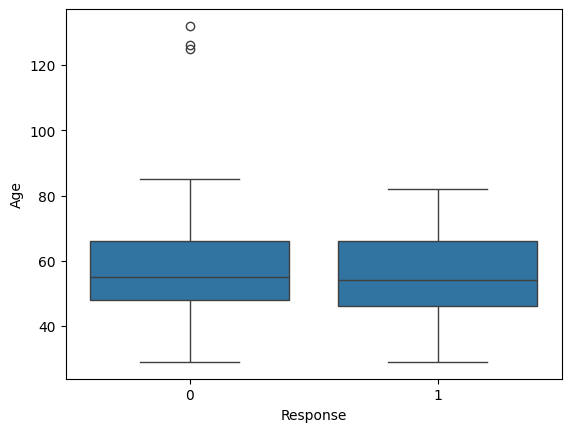

In [22]:
sns.boxplot(x='Response', y='Age', data=df)
plt.show()


### Country with Highest Campaign Acceptance

In [23]:
df.groupby('Country_US')['Response'].sum()


Country_US
False    319
True      13
Name: Response, dtype: int64

### Children vs Total Spending

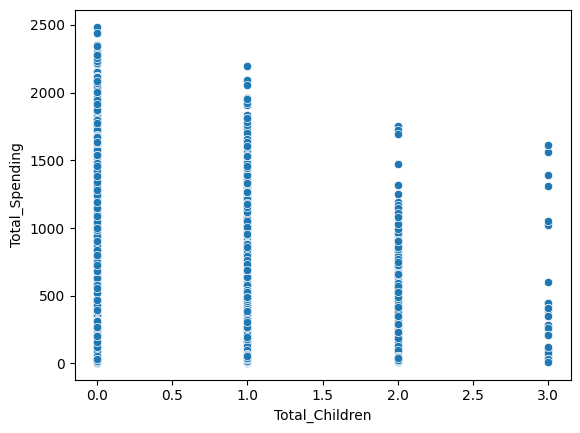

In [24]:
sns.scatterplot(x='Total_Children', y='Total_Spending', data=df)
plt.show()

### Education vs Complaints

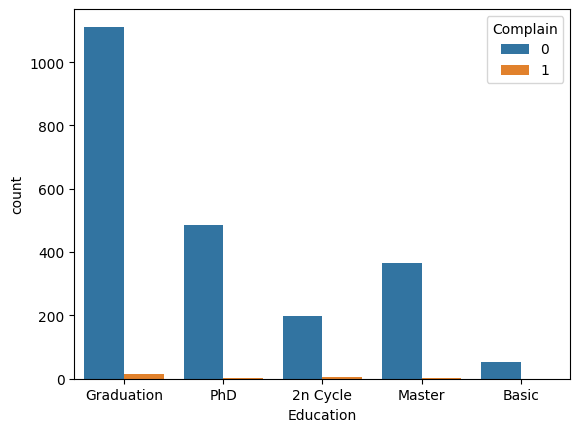

In [25]:
sns.countplot(x='Education', hue='Complain', data=df)
plt.show()